In [35]:
# Python Standard Libraries
import os
import sys

# Python Scientific Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics.pairwise import euclidean_distances

# Project Libraries
sys.path.append('../../src')
# import lib.exp4 as exp4
# import lib.reconstruction.errors as errs
# import lib.reconstruction.features as ftrs
# import lib.reconstruction.neighbors as nbrs

# import lib.utility_functions as uf
# import lib.util.datatype_utilities as dtutils

from lib.reconstruction.errors import get_errors_per_location
from lib.util.datatype_utilities import position_string_to_array

# Config
sns.set_style('white')
sns.set_context('paper')

pd.set_option('display.max_columns', 40)

%matplotlib inline

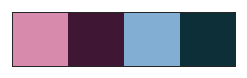

In [2]:
colors = sns.cubehelix_palette(n_colors=2, start=0.5, hue=1, rot=.1, light=.65) 
colors += sns.cubehelix_palette(n_colors=2, start=2.5, hue=1, rot=.1, light=.65)
sns.palplot(colors)

In [3]:
colors = dict(zip(['real', 'fake', 'trained', 'untrained'], colors))

In [4]:
tidy = pd.read_csv('../../src/tidy_data.csv', index_col=0)
tidy['Condition'] = tidy['Condition'].map(lambda x: 'Untrained' if x == 'Naive' else x)
tidy['Position ID'] = tidy['Position ID'].map(int)
tidy['Num Dif'] = tidy['Num Pieces (final)'] - tidy['Num Pieces']

vals = ['Black Position', 'White Position', 'Is Real', 'Num Pieces']

board_set = tidy.pivot_table(index='Position ID', values=vals, aggfunc=lambda x: x.unique()[0])[vals]

In [21]:
def position_string_to_coordinates(position_string):
    position_array = position_string_to_array(position_string)
    coordinates = np.stack(np.where(position_array == 1)).T
    return coordinates


filled_board = np.ones((4, 9), dtype=np.uint8)
all_coordinates = np.stack(np.where(filled_board == 1)).T


def get_distances_to_centroid(position_string):
    position_array = position_string_to_array(position_string)
    coordinates = np.stack(np.where(position_array == 1)).T
    centroid = coordinates.mean(axis=0, keepdims=True)
    distances = euclidean_distances(centroid, all_coordinates).reshape((4, 9))
    
    return distances


def apply_get_distances(row):
    black_position_string = row['Black Position']
    white_position_string = row['White Position']
    
    black_coordinates = position_string_to_coordinates(black_position_string)
    white_coordinates = position_string_to_coordinates(white_position_string)
    coordinates = np.concatenate([black_coordinates, white_coordinates])
    
    centroid = coordinates.mean(axis=0, keepdims=True)
    distances = euclidean_distances(centroid, all_coordinates)
    
    return distances[0, :].tolist()

distances_df = pd.DataFrame(
    board_set.apply(apply_get_distances, axis=1), 
    index=board_set.index, 
    columns=['distance']
)
    

# distances = get_distances_to_centroid(board_set.loc[0, 'Black Position'])

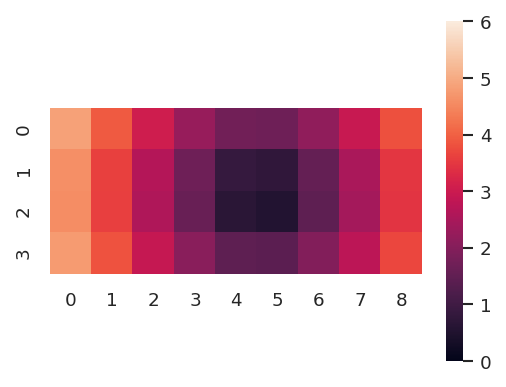

In [37]:
fig, axes = plt.subplots(1, 1, figsize=(4, 3), dpi=150)
sns.heatmap(np.stack(distances_df.loc[70]).reshape(4, 9), square=True, ax=axes, vmin=0, vmax=6);

In [36]:
errors_by_location_2 = tidy.apply(lambda x: get_errors_per_location(x, '2'), 
                                  axis=1)

In [ ]:
# Distance from board center
# Rank
# Spearman with error dependent

# Also
# Is neighborhood size correlated with distance from board center?

# Add coefficient to logistic regression for distance to board center
# Scatter nbrh size vs board center distance

# Fancy plot
# Scatter nbrh size; each point coded by Type II (gradient color)